Import libraries


In [1]:
import random
from scipy import special as sc
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas
from matplotlib.table import Table

Fitness Calculation

In [2]:
def fitness_score(seq):
    score = 0
    for row in range(NUM_QUEENS):
        col = seq[row]

        for other_row in range(NUM_QUEENS):

            # queens cannot pair with itself
            if other_row == row:
                continue
            # row and column check
            if seq[other_row] == col:
                continue
            #diagonal checks
            if other_row + seq[other_row] == row + col:
                continue
            if other_row - seq[other_row] == row - col:
                continue
            # score++ if every pair of queens are non-attacking.
            # total score must be n*(n-1)/2
            score += 1

    # divide by 2 as pairs of queens are commutative
    return score / 2


Algorithm functions

In [3]:
def selection(populate):
    parents = []
    for ind in populate:
        # select parents with probability proportional to their fitness score
        if random.randrange(sc.comb(NUM_QUEENS, 2) * 2) < fitness_score(ind):
            parents.append(ind)

    return parents

"""
the section that defines memetic algorithm,
this is what we use to reduce time complexity
"""

def crossover(parents):
    # random indexes to to cross states with
    cross_points = random.sample(range(NUM_QUEENS), MIXING_NUMBER - 1)
    offsprings = []

    # all permutations of parents
    permutations = list(itertools.permutations(parents, MIXING_NUMBER))

    for perm in permutations:
        offspring = []

        # track starting index of sublist
        start_pt = 0

        for parent_idx, cross_point in enumerate(cross_points):  # doesn't account for last parent

            # sublist of parent to be crossed
            parent_part = perm[parent_idx][start_pt:cross_point]
            offspring.append(parent_part)

            # update index pointer
            start_pt = cross_point

        # last parent
        last_parent = perm[-1]
        parent_part = last_parent[cross_point:]
        offspring.append(parent_part)

        # flatten the list since append works kinda differently
        offsprings.append(list(itertools.chain(*offspring)))

    return offsprings


def mutate(seq):
    for row in range(len(seq)):
        if random.random() < MUTATION_RATE:
            seq[row] = random.randrange(NUM_QUEENS)

    return seq

def print_found_goal(populations, to_print=True):
    global solution
    for ind in populations:
        score = fitness_score(ind)
        print(score)
        if score == sc.comb(NUM_QUEENS, 2):
            if to_print:
                print('Solution found')
                solution = ind
            return True
        break

    if to_print:
        print('Solution not found')
    return False


def evolution(populate):
    # select individuals to become parents
    parents = selection(populate)

    # recombination. Create new offsprings
    offsprings = crossover(parents)

    # mutation
    offsprings = list(map(mutate, offsprings))

    # introduce top-scoring individuals from previous generation and keep top fitness individuals
    new_gen = offsprings

    for ind in populate:
        new_gen.append(ind)

    new_gen = sorted(new_gen, key=lambda index: fitness_score(index), reverse=True)[:POPULATION_SIZE]

    return new_gen


def generate_population():
    initPopulation = []
    for individual in range(POPULATION_SIZE):
        new = [random.randrange(NUM_QUEENS) for _ in range(NUM_QUEENS)]
        initPopulation.append(new)

    return initPopulation


Define parameters

In [4]:
NUM_QUEENS = int(input('Enter Number of Queens: '))
POPULATION_SIZE = 15
MIXING_NUMBER = 2
MUTATION_RATE = 0.012

Running the experiment

In [5]:
generation = 0
# generate random population
population = generate_population()

# for plot creation
solution = []
lables = []

for i in range(NUM_QUEENS):
    lables.append(i)

while not print_found_goal(population):
    print(f'Generation: {generation}')
    print_found_goal(population)
    population = evolution(population)
    generation += 1

#print answer
print(solution)

8.0
Solution not found
Generation: 0
8.0
Solution not found
8.0
Solution not found
Generation: 1
8.0
Solution not found
10.0
Solution found
[1, 4, 2, 0, 3]


C:\Users\mrmas\AppData\Local\Temp/ipykernel_18428/801981907.py:5: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  if random.randrange(sc.comb(NUM_QUEENS, 2) * 2) < fitness_score(ind):


Create plot

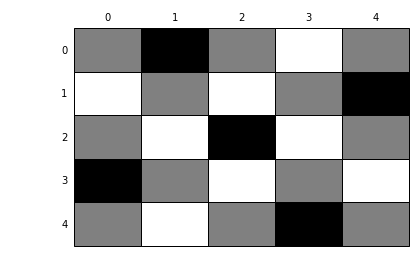

In [6]:
def graph():
    data = pandas.DataFrame(np.random.random((NUM_QUEENS, NUM_QUEENS)))
    checkerboard_table(data)
    plt.show()

def checkerboard_table(data, bkg_colors=None):
    if bkg_colors is None:
        bkg_colors = ['gray', 'white']

    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = data.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    for i in range(NUM_QUEENS):
        for j in range(NUM_QUEENS):
            idx = [j % 2, (j + 1) % 2][i % 2]
            color = bkg_colors[idx]
            if solution[i] == j:
                tb.add_cell(i, j, width, height,
                            loc='center', facecolor='black')
            else:
                tb.add_cell(i, j, width, height,
                            loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right',
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height / 2, text=label, loc='center',
                    edgecolor='none', facecolor='none')
    ax.add_table(tb)
    return fig


graph()

second run

In [ ]:
NUM_QUEENS = int(input('Enter Number of Queens: '))
POPULATION_SIZE = 16
MIXING_NUMBER = 2
MUTATION_RATE = 0.05

Running the experiment

279.0
Solution not found
Generation: 0
279.0
Solution not found
281.0
Solution not found
Generation: 1
281.0
Solution not found
283.0
Solution not found
Generation: 2
283.0
Solution not found
286.0
Solution not found
Generation: 3
286.0
Solution not found
286.0
Solution not found
Generation: 4
286.0
Solution not found
286.0
Solution not found
Generation: 5
286.0
Solution not found
287.0

C:\Users\mrmas\AppData\Local\Temp/ipykernel_18428/801981907.py:5: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  if random.randrange(sc.comb(NUM_QUEENS, 2) * 2) < fitness_score(ind):



Solution not found
Generation: 6
287.0
Solution not found
289.0
Solution not found
Generation: 7
289.0
Solution not found
289.0
Solution not found
Generation: 8
289.0
Solution not found
290.0
Solution not found
Generation: 9
290.0
Solution not found
290.0
Solution not found
Generation: 10
290.0
Solution not found
290.0
Solution not found
Generation: 11
290.0
Solution not found
291.0
Solution not found
Generation: 12
291.0
Solution not found
292.0
Solution not found
Generation: 13
292.0
Solution not found
292.0
Solution not found
Generation: 14
292.0
Solution not found
292.0
Solution not found
Generation: 15
292.0
Solution not found
292.0
Solution not found
.........
.........
....wait..for..it.....
.........
.........
Generation: 306
299.0
Solution not found
299.0
Solution not found
Generation: 307
299.0
Solution not found
299.0
Solution not found
Generation: 308
299.0
Solution not found
299.0
Solution not found
Generation: 309
299.0
Solution not found
299.0
Solution not found
Generat

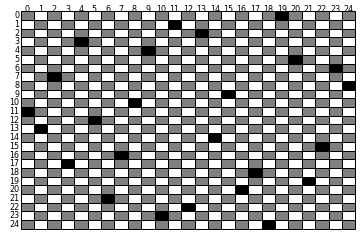

In [8]:
generation = 0
# generate random population
population = generate_population()

# for plot creation
solution = []
lables = []

for i in range(NUM_QUEENS):
    lables.append(i)

while not print_found_goal(population):
    print(f'Generation: {generation}')
    print_found_goal(population)
    population = evolution(population)
    generation += 1

#print answer
print(solution)

graph()


third run

In [ ]:
NUM_QUEENS = int(input('Enter Number of Queens: '))
POPULATION_SIZE = 16
MIXING_NUMBER = 2
MUTATION_RATE = 0.011

Running the experiment

4841.0
Solution not found
Generation: 0
4841.0
Solution not found


C:\Users\mrmas\AppData\Local\Temp/ipykernel_18428/801981907.py:5: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  if random.randrange(sc.comb(NUM_QUEENS, 2) * 2) < fitness_score(ind):


4854.0
Solution not found
Generation: 1
4854.0
Solution not found
4854.0
Solution not found
Generation: 2
4854.0
Solution not found
4863.0
Solution not found
Generation: 3
4863.0
Solution not found
4867.0
Solution not found
Generation: 4
4867.0
Solution not found
4867.0
Solution not found
Generation: 5
4867.0
Solution not found
4867.0
Solution not found
Generation: 6
4867.0
Solution not found
4870.0
Solution not found
Generation: 7
4870.0
Solution not found
4874.0
Solution not found
Generation: 8
4874.0
Solution not found
4874.0
Solution not found
Generation: 9
4874.0
Solution not found
4877.0
Solution not found
Generation: 10
4877.0
Solution not found
4877.0
Solution not found
Generation: 11
4877.0
Solution not found
4882.0
Solution not found
Generation: 12
4882.0
Solution not found
4883.0
Solution not found
Generation: 13
4883.0
Solution not found
4885.0
Solution not found
Generation: 14
4885.0
Solution not found
4887.0
Solution not found
Generation: 15
4887.0
Solution not found
4890

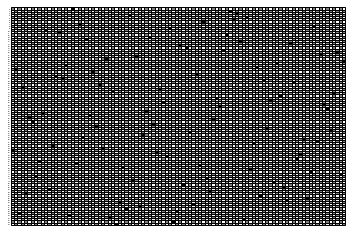

In [10]:
generation = 0
# generate random population
population = generate_population()

# for plot creation
solution = []
lables = []

for i in range(NUM_QUEENS):
    lables.append(i)

while not print_found_goal(population):
    print(f'Generation: {generation}')
    print_found_goal(population)
    population = evolution(population)
    generation += 1

#print answer
print(solution)

graph()
